In [1]:
import pandas as pd

Loading and viewing the Dataset

In [2]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Performing one hot encoding on columns and removinf NAN values(if any)

In [6]:
df=pd.get_dummies(df)

In [7]:
len(df)

1338

In [8]:
len(df.dropna())

1338

Defining Accuracy Function

In [22]:
def accuracy(y_pred,y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    print("MAE",metrics.mean_absolute_error(y_test,y_pred))
    print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))    # using heatmap to plot accuracy
    plt.scatter(y_test,y_pred)
    plt.xlabel('predicted values')
    plt.ylabel('true values')
    plt.show()

Split into training ans testing dataset

In [9]:
y=df['charges']
x=df.drop(columns=['charges'])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True)

1)Using Random Forest Regression

In [16]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(x_train,y_train)
y_pred_randf=regressor.predict(x_test)

2)Using SGD Regression

In [17]:
from sklearn.linear_model import SGDRegressor
clf=SGDRegressor(max_iter=1000,tol=1e-3)
clf.fit(x,y)
y_pred_sgd=clf.predict(x_test)

3)Using Lasso Regression

In [18]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=100)
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)

C:\Users\Juhi Kamdar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


4)Using Elastic net Regression

In [19]:
#ElasticNet Regession
from sklearn.linear_model import ElasticNet
model=ElasticNet()
model.fit(x_train,y_train)
y_pred_elastic=model.predict(x_test)

C:\Users\Juhi Kamdar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5)Using Support Vector Regression

In [20]:
from sklearn import svm
clf = svm.SVR(kernel='rbf')
clf.fit(x,y)
y_pred_svr=clf.predict(x_test)

C:\Users\Juhi Kamdar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Random Forest
MAE 2321.122070847836
RMSE 3976.5750678703776


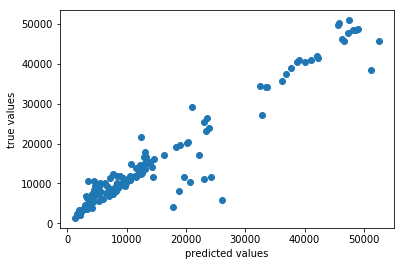

SGD Regression
MAE 6.748177399619579e+18
RMSE 7.974406514856268e+18


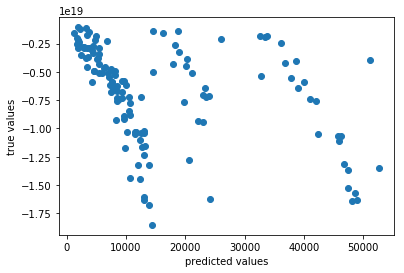

Lasso Regression
MAE 3075.322294248025
RMSE 4493.759087588331


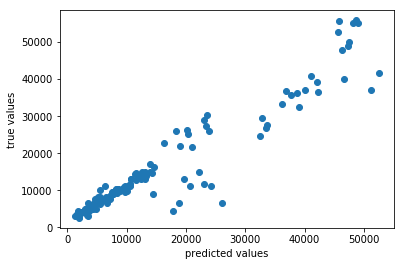

Elastic Net Regression
MAE 3114.064589911256
RMSE 4511.532512280832


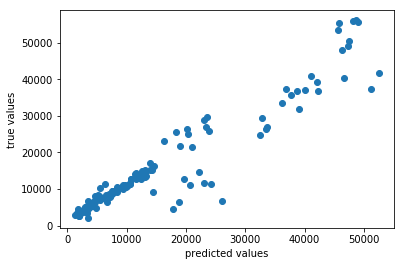

SVR Regression
MAE 9936.304579328358
RMSE 15252.443500359752


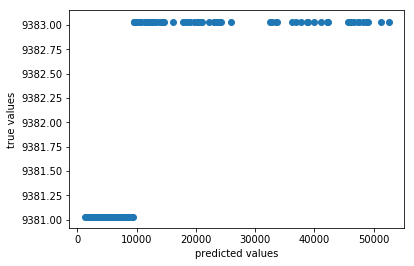

In [24]:
print("Random Forest")
accuracy(y_pred_randf,y_test)
print("SGD Regression")
accuracy(y_pred_sgd,y_test)
print("Lasso Regression")
accuracy(y_pred_lasso,y_test)
print("Elastic Net Regression")
accuracy(y_pred_elastic,y_test)
print("SVR Regression")
accuracy(y_pred_svr,y_test)